In [1]:
# Importing libraries for tabular data and plotting
import hvplot.pandas
import pandas as pd
import holoviews as hv
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Define the URL for Albany mean temperature data download
alb_temp_url = (
    'https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/'
    'time-series/USW00014735/tmax/1/8/1930-2023.csv')
alb_temp_url

'https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USW00014735/tmax/1/8/1930-2023.csv'

In [3]:
# Import Albany temperature values from NCEI
alb_temp_df = pd.read_csv(
    alb_temp_url, header=3, names=['year', 'temperature_f'])

alb_temp_df

,year,temperature_f
0,193808,85.4
1,193908,86.4
2,194008,80.0
3,194108,80.4
4,194208,79.9
...,...,...
81,201908,82.2
82,202008,82.7
83,202108,83.4
84,202208,86.2


In [4]:
# Extract the year from the date
alb_temp_df.year = pd.to_datetime(alb_temp_df.year, format='%Y%m').dt.year

alb_temp_df

,year,temperature_f
0,1938,85.4
1,1939,86.4
2,1940,80.0
3,1941,80.4
4,1942,79.9
...,...,...
81,2019,82.2
82,2020,82.7
83,2021,83.4
84,2022,86.2


In [5]:
# Define and execute function for converting incoming fahrenheit data
# to celcius
def convert(temperature_fahrenheit: float):
    """Convert temperature in Fahrenheit to Celcius"""
    return (temperature_fahrenheit - 32) * 5 / 9


alb_temp_df['temperature_c'] = alb_temp_df['temperature_f'].apply(convert)

alb_temp_df

,year,temperature_f,temperature_c
0,1938,85.4,29.666667
1,1939,86.4,30.222222
2,1940,80.0,26.666667
3,1941,80.4,26.888889
4,1942,79.9,26.611111
...,...,...,...
81,2019,82.2,27.888889
82,2020,82.7,28.166667
83,2021,83.4,28.555556
84,2022,86.2,30.111111


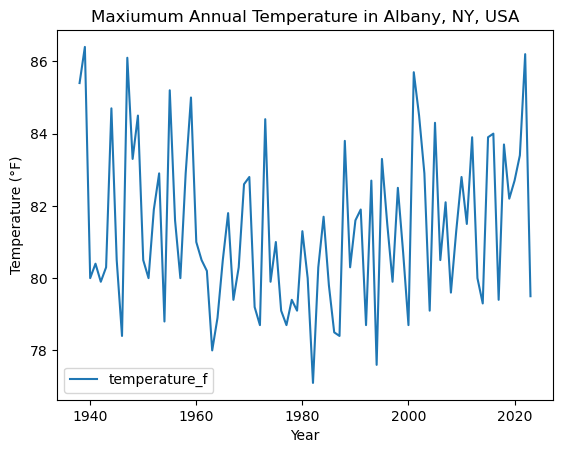

In [6]:
# Plot the Albany Temperature data over time
plot = alb_temp_df.plot(
    x='year', y='temperature_f',
    title='Maxiumum Annual Temperature in Albany, NY, USA',
    xlabel='Year', ylabel='Temperature (°F)');



In [7]:
%%capture
%%bash
jupyter nbconvert albanytemperature.ipynb --to html --no-input